<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Sales_Forecasting_%26_Campaign_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/marceaxl82/shopping-mall-paid-search-campaign-dataset

Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Load the dataset

In [6]:
df = pd.read_csv('/content/final_shop_6modata.csv')
df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604


Data Exploration

In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (190, 12)


In [8]:
print("\nData types:\n", df.dtypes)


Data types:
 Ad Group        object
Month           object
Impressions      int64
Clicks           int64
CTR            float64
Conversions      int64
Conv Rate      float64
Cost             int64
CPC            float64
Revenue          int64
Sale Amount    float64
P&L            float64
dtype: object


In [9]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Ad Group       0
Month          0
Impressions    0
Clicks         0
CTR            0
Conversions    0
Conv Rate      0
Cost           0
CPC            0
Revenue        0
Sale Amount    0
P&L            0
dtype: int64


In [10]:
df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604


📊 Step 2: Basic Exploratory Data Analysis (EDA)

In [11]:
# Summary statistics
df.describe()

,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,14077.363158,4865.805263,0.272105,505.242105,0.079737,3344.063158,0.791263,2957.684211,63416.180579,-386.361916
std,29771.686227,11348.529219,0.107894,1052.202922,0.052859,6524.606753,0.403312,5962.413097,125414.656922,903.073776
min,35.000000,2.000000,0.050000,0.000000,0.000000,1.000000,0.140000,0.000000,0.000000,-5672.271000
25%,1065.000000,264.500000,0.192500,24.000000,0.050000,188.500000,0.480000,144.500000,2985.135000,-294.977500
50%,4969.000000,930.000000,0.285000,70.500000,0.070000,563.500000,0.635000,459.500000,10274.105000,-75.978000
75%,13380.000000,4190.500000,0.360000,428.250000,0.100000,2967.000000,1.107500,2672.250000,59345.195000,-6.027500
max,276568.000000,99526.000000,0.470000,7563.000000,0.500000,43542.000000,2.020000,42440.000000,886095.310000,1507.685000


In [12]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


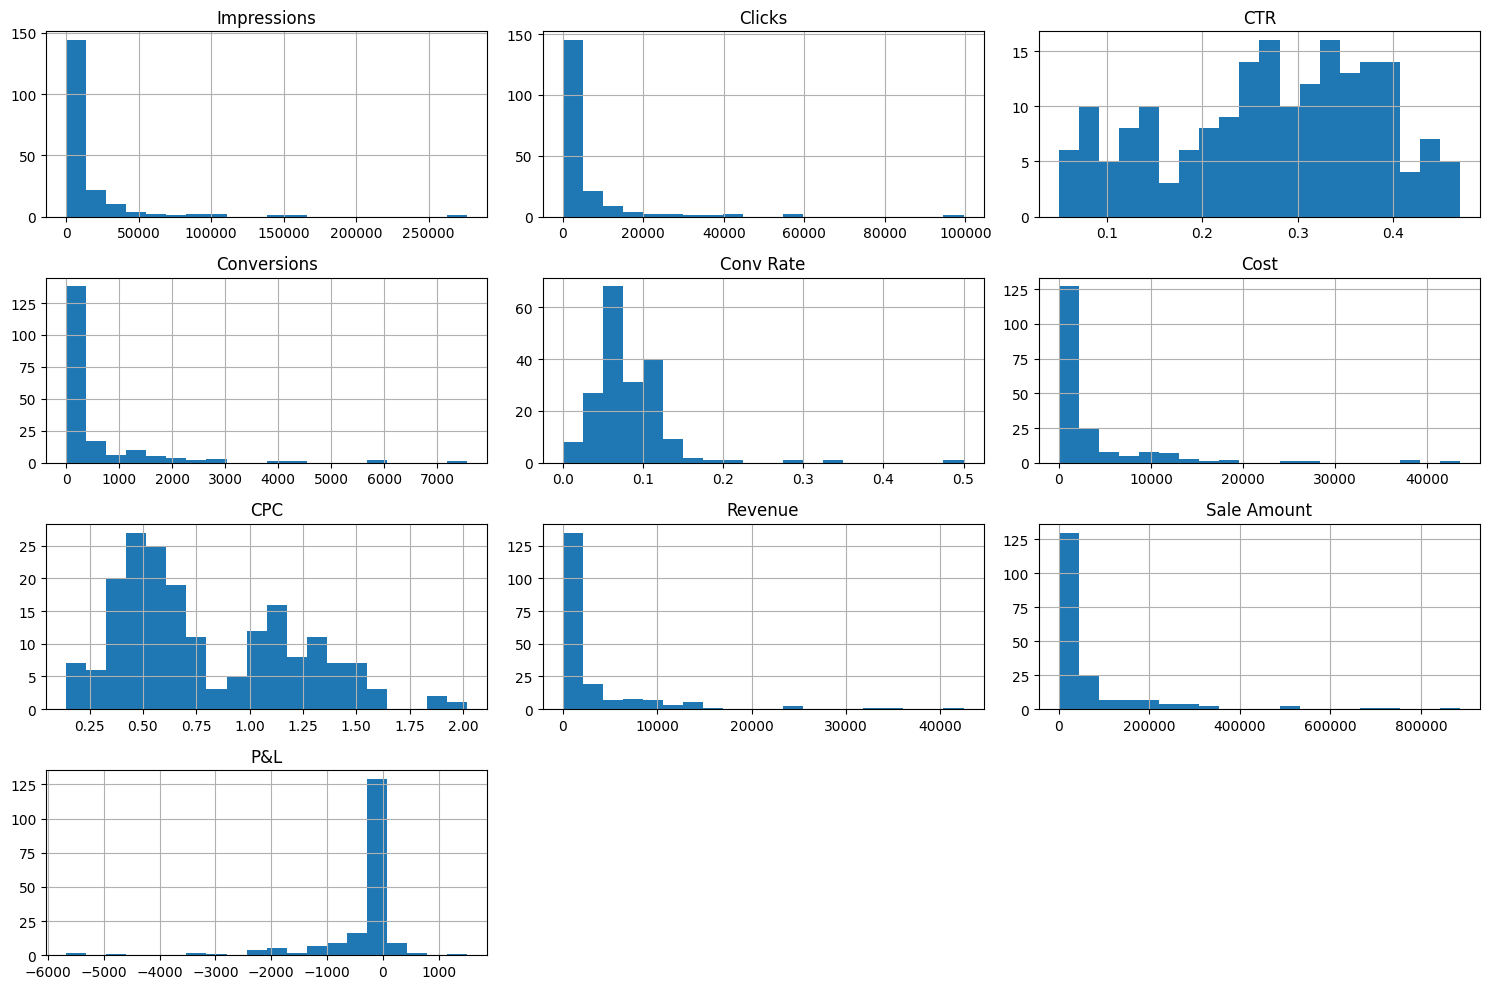

In [17]:
# Visualize column distribution
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [19]:
print("Column data types:")
print(df.dtypes)

Column data types:
Ad Group        object
Month           object
Impressions      int64
Clicks           int64
CTR            float64
Conversions      int64
Conv Rate      float64
Cost             int64
CPC            float64
Revenue          int64
Sale Amount    float64
P&L            float64
dtype: object


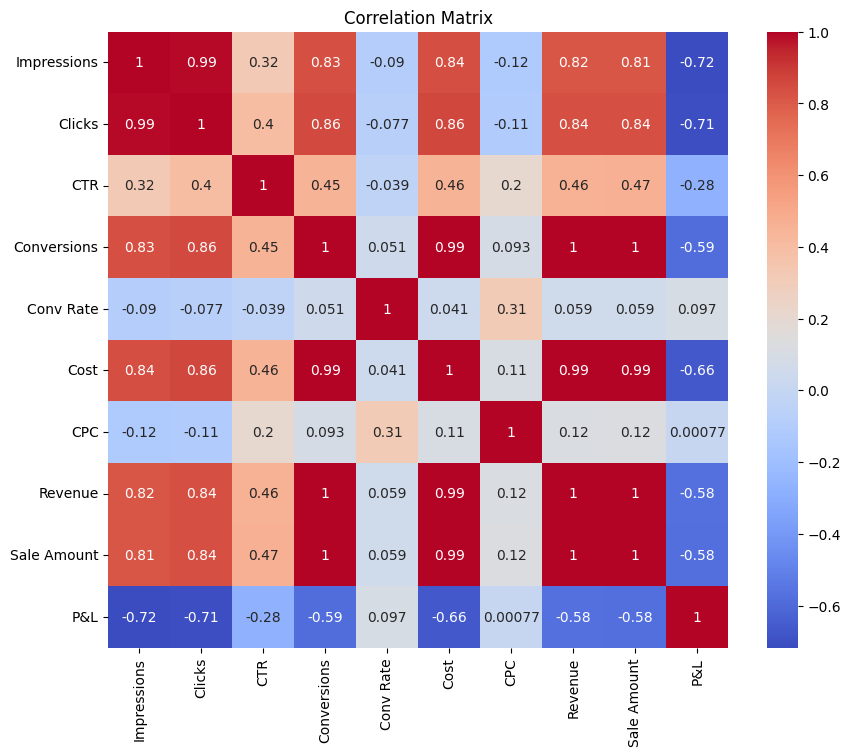

In [18]:
# Correlation heatmap for numeric columns only
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Check if 'sales' column exists and is numeric
if 'sales' in df.columns and np.issubdtype(df['sales'].dtype, np.number):
  # Prepare the data
    X = df.select_dtypes(include=[np.number]).drop(columns=['sales'])
    y = df['sales']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = {
        "R² Score": r2,
        "RMSE": rmse
    }
else:
    result = "The dataset does not contain a numeric 'sales' column."

result

"The dataset does not contain a numeric 'sales' column."

Feature Selection & Preprocessing
Make sure you're only working with numeric columns for modeling:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# Define features (X) and target (y)
X = df.drop(columns=['P&L'])  # Assuming you're predicting P&L; change if needed
y = df['P&L']

# Keep only numeric columns in X
X = X.select_dtypes(include='number')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional but helpful for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Regression Models
We'll try multiple regression models and compare their performance.

In [24]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Initialize models

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

(when you use the older version you are most likely to get an error) likely using an older version of scikit-learn that doesn't support the squared=False argument in mean_squared_error.

instead of this ...mean_squared_error(y_test, y_pred, squared=False).... i should use this .....np.sqrt(mean_squared_error(y_test, y_pred))......

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(0.2984137954931517)

**Train and evaluate models**

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}")
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression
R² Score: 0.9999998811334124
RMSE: 0.2984137954931517

Ridge Regression
R² Score: 0.7481593419867855
RMSE: 434.36209736280136

Random Forest
R² Score: 0.3036292577910581
RMSE: 722.2860994228802


**Visualize Predictions vs** **Actuals** **bold text**

#Plot actual vs predicted values for best model (e.g., Linear Regression)

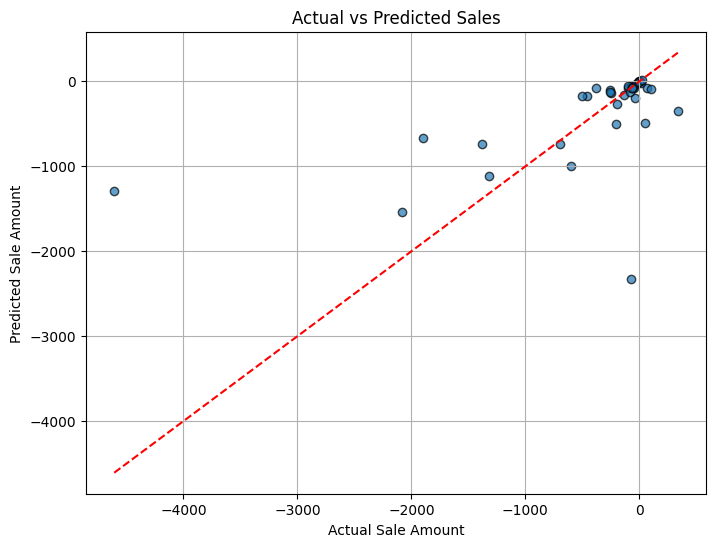

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

Feature Importance (for Tree-Based Models)

**Only for tree-based models like Random Forest**

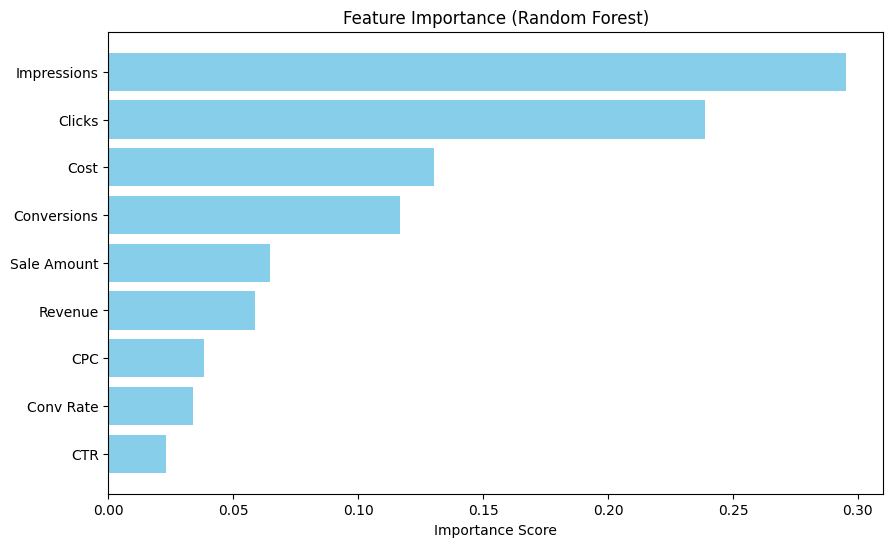

In [34]:
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

Hyperparameter Tuning (Optional but Improves Accuracy)

In [35]:
from sklearn.model_selection import GridSearchCV

For this case as an example: GridSearch on Random Forest

In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 100}


💾: Save my Model for Reuse

In [37]:
import joblib

**Save model**

*  Load model later

*  loaded_model = joblib.load('final_sales_model.pkl')



In [38]:
joblib.dump(best_rf_model, 'final_sales_model.pkl')

['final_sales_model.pkl']

🧪: Predict New Data

** Example new input (ensure same structure and scaling)**

In [39]:
new_data = pd.DataFrame([X_test.iloc[0]])  # Using one test row
new_pred = best_rf_model.predict(scaler.transform(new_data))
print("Predicted Sale Amount:", new_pred[0])

Predicted Sale Amount: -2329.198950000002


📊 Top Campaigns or Months Visualization

# Total revenue by Ad Group

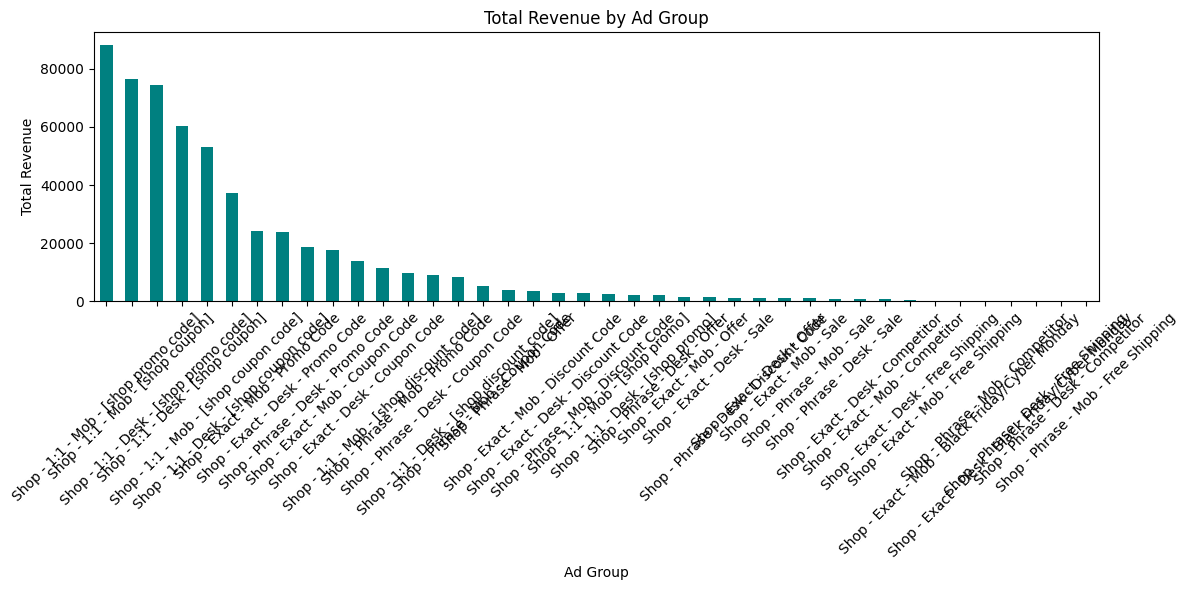

In [42]:
plt.figure(figsize=(12,6))
df.groupby("Ad Group")["Revenue"].sum().sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Total Revenue by Ad Group")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly performance trend

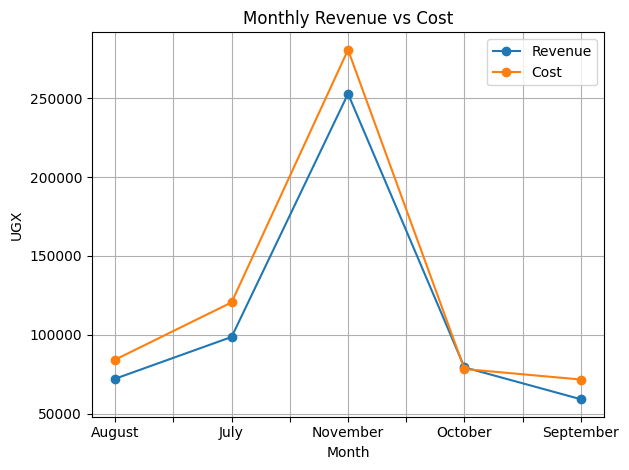

In [43]:
df.groupby("Month")[["Revenue", "Cost"]].sum().plot(kind='line', marker='o')
plt.title("Monthly Revenue vs Cost")
plt.ylabel("UGX")
plt.grid(True)
plt.tight_layout()
plt.show()

Here is a simple README file to describe your project:


Subtitle:
Insights from Digital Ad Campaigns



* # 📈 Sales Forecasting & Campaign Analysis

* This project uses marketing campaign data to:

* Predict future sale amounts using machine learning (Random Forest, Linear Regression)
* Analyze trends in cost, revenue, and P&L across campaigns

* Identify top-performing ad groups

* Provide decision-making insights via visualizations



## Project Files
- `data/final_shop_6modata.csv`: Raw data
- `notebooks/analysis.ipynb`: Code and analysis
- `models/final_sales_model.pkl`: Trained model
- `outputs/predictions.csv`: Model results
- `outputs/feature_importance.png`: Model insight


## Tools Used
- Python, Pandas, Scikit-Learn, Seaborn, Matplotlib

## Author
Samuel Mukisa (contact: mukisasamuel668@gmail.com)